<a href="https://colab.research.google.com/github/skimaza/assist_ai/blob/main/mlp_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379


In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt

import numpy as np
import imageio
from IPython.display import Image

In [ ]:
torch.manual_seed(1)    # 실행할 때마다 같은 결과를 내기 위해 random seed를 고정

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

figsize = (10,5)
# view data
plt.figure(figsize=figsize)
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis Training Data')
plt.xlabel('Independent varible (x)')
plt.ylabel('Dependent varible (y)')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=figsize)

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=24)
    ax.set_xlabel('Independent variable (x)', fontsize=18)
    ax.set_ylabel('Dependent variable (y)', fontsize=18)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 18, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 18, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)

# save images as a gif    
imageio.mimwrite('./curve_1.gif', my_images, fps=10)
plt.show()
# show animated gif
print('Show training steps')
Image(open('curve_1.gif','rb').read())

# 코드 살펴보기

학습데이터 생성  
$y=x^{2}+\delta$  
$\delta$: random noise

-1과 1 사이에 동일한 간격으로 100개의 값을 추출하여 x값으로 사용  
torch.unsqeeze(..., dim=1) 함수로 1차원 텐서를 2차원 텐서로 변환  


In [ ]:
torch.manual_seed(1)    # 실행할 때마다 같은 결과를 내기 위해 random seed를 고정

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)


In [ ]:
torch.linspace(-1, 1, 100)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [ ]:
torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [ ]:
x

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [ ]:
x.size()

torch.Size([100, 1])

In [ ]:
x.pow(2)

tensor([[1.0000e+00],
        [9.6000e-01],
        [9.2082e-01],
        [8.8246e-01],
        [8.4491e-01],
        [8.0818e-01],
        [7.7227e-01],
        [7.3717e-01],
        [7.0289e-01],
        [6.6942e-01],
        [6.3677e-01],
        [6.0494e-01],
        [5.7392e-01],
        [5.4372e-01],
        [5.1434e-01],
        [4.8577e-01],
        [4.5801e-01],
        [4.3108e-01],
        [4.0496e-01],
        [3.7966e-01],
        [3.5517e-01],
        [3.3150e-01],
        [3.0864e-01],
        [2.8660e-01],
        [2.6538e-01],
        [2.4498e-01],
        [2.2539e-01],
        [2.0661e-01],
        [1.8865e-01],
        [1.7151e-01],
        [1.5519e-01],
        [1.3968e-01],
        [1.2499e-01],
        [1.1111e-01],
        [9.8051e-02],
        [8.5808e-02],
        [7.4380e-02],
        [6.3769e-02],
        [5.3974e-02],
        [4.4995e-02],
        [3.6833e-02],
        [2.9487e-02],
        [2.2957e-02],
        [1.7243e-02],
        [1.2346e-02],
        [8

In [ ]:
torch.rand(x.size())

tensor([[0.9579],
        [0.4075],
        [0.7819],
        [0.7165],
        [0.1768],
        [0.0748],
        [0.9799],
        [0.5261],
        [0.8427],
        [0.6036],
        [0.6608],
        [0.8735],
        [0.9741],
        [0.1682],
        [0.5625],
        [0.8731],
        [0.8622],
        [0.8106],
        [0.1381],
        [0.1399],
        [0.1976],
        [0.5628],
        [0.9983],
        [0.1842],
        [0.7664],
        [0.2233],
        [0.0299],
        [0.3937],
        [0.7881],
        [0.9642],
        [0.1895],
        [0.6085],
        [0.9314],
        [0.8313],
        [0.8116],
        [0.8553],
        [0.8163],
        [0.6291],
        [0.1581],
        [0.0801],
        [0.2709],
        [0.4418],
        [0.1935],
        [0.6829],
        [0.6547],
        [0.3868],
        [0.6922],
        [0.6616],
        [0.8053],
        [0.8367],
        [0.3307],
        [0.9885],
        [0.4422],
        [0.4828],
        [0.0281],
        [0

In [ ]:
y

tensor([[1.1515],
        [1.0159],
        [1.0014],
        [1.0294],
        [0.8508],
        [0.9682],
        [0.8517],
        [0.8880],
        [0.8168],
        [0.7572],
        [0.7645],
        [0.7099],
        [0.7104],
        [0.6047],
        [0.6070],
        [0.5768],
        [0.5725],
        [0.5307],
        [0.5924],
        [0.5108],
        [0.4179],
        [0.3711],
        [0.3919],
        [0.3435],
        [0.3333],
        [0.3498],
        [0.3850],
        [0.3610],
        [0.1909],
        [0.3335],
        [0.2831],
        [0.3345],
        [0.2910],
        [0.1200],
        [0.1030],
        [0.1376],
        [0.2622],
        [0.1471],
        [0.1968],
        [0.0985],
        [0.2350],
        [0.0872],
        [0.1979],
        [0.1184],
        [0.0597],
        [0.1597],
        [0.0519],
        [0.1320],
        [0.0720],
        [0.0891],
        [0.0040],
        [0.0532],
        [0.1568],
        [0.0807],
        [0.2079],
        [0

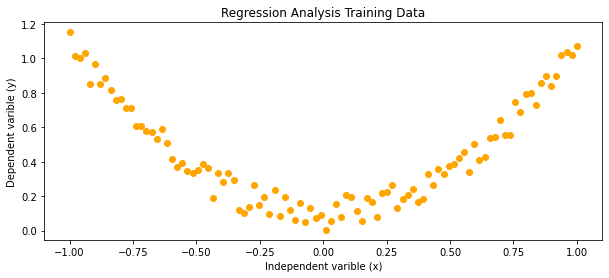

In [ ]:

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis Training Data')
plt.xlabel('Independent varible (x)')
plt.ylabel('Dependent varible (y)')
plt.show()


In [ ]:
# simple two layer MLP. 1 -> 10 -> 1
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


Stochastic Gradient Descent optimizer  
Loss는 Mean Square Error  
$loss = \frac{1}{n}{\sum(\hat{y}_{i} - y_{i})^{2}}$

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

MSELoss 동작 확인

2x2 입력과 2x2 target 생성

In [ ]:
loss_test = torch.nn.MSELoss()
output_test = torch.randn(2, 2, requires_grad=True)
target_test = torch.randn(2, 2)


In [ ]:
output_test

tensor([[ 0.3884,  0.7387],
        [-1.1045, -1.3581]], requires_grad=True)

In [ ]:
target_test

tensor([[ 1.1082, -0.0210],
        [-1.1702, -0.0558]])

In [ ]:
output_test = loss_test(input_test, target_test)

In [ ]:
output_test

tensor(0.5127, grad_fn=<MseLossBackward>)

MSE 결과 비교

autograd 텐서는 numpy로 변환하기 전에 detach()를 해야 한다

In [ ]:
inp = input_test.detach().numpy()
tgt = target_test.detach().numpy()

In [ ]:
inp.shape

(2, 2)

In [ ]:
error_sum = 0
for i in range(inp.shape[0]):
    for j in range(inp.shape[1]):
        print('input_test', i, j, '= ', inp[i,j])
        print('target_test', i, j, '= ', tgt[i,j])
        error_squared = ( inp[i,j] - tgt[i,j])**2
        print('squared error = ', error_squared)
        error_sum += error_squared
print(error_sum)
print(error_sum / (inp.shape[0] * inp.shape[1]))

input_test 0 0 =  0.4380925
target_test 0 0 =  0.66619545
squared error =  0.05203095682146941
input_test 0 1 =  -0.35800534
target_test 0 1 =  -1.2859336
squared error =  0.8610508722412966
input_test 1 0 =  1.3912512
target_test 1 0 =  0.32697105
squared error =  1.1326922426241168
input_test 1 1 =  -0.21949586
target_test 1 1 =  -0.2913766
squared error =  0.005166839058724726
2.0509409107456076
0.5127352276864019


In [ ]:
output_test.backward()

In [ ]:
output_test

tensor(0.5127, grad_fn=<MseLossBackward>)

학습을 진행하며 중간결과는 plotting을 위해 저장

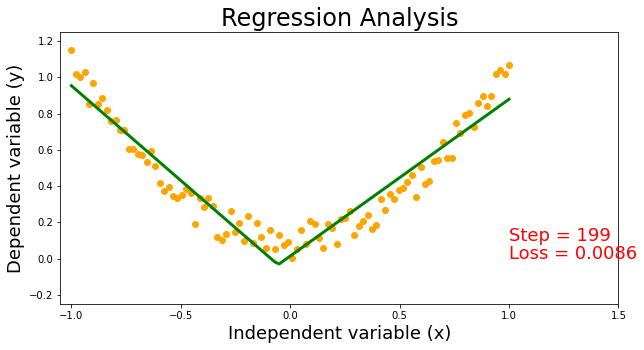

In [ ]:
my_images = []
fig, ax = plt.subplots(figsize=figsize)

# train the network for 200 epochs
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # network output과 target 값으로 loss 계산

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=24)
    ax.set_xlabel('Independent variable (x)', fontsize=18)
    ax.set_ylabel('Dependent variable (y)', fontsize=18)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 18, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 18, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)

In [ ]:
# save images as a gif    
imageio.mimwrite('./curve_1.gif', my_images, fps=10)
plt.show()
# show animated gif
print('Show training steps')
Image(open('curve_1.gif','rb').read())

# Try another example

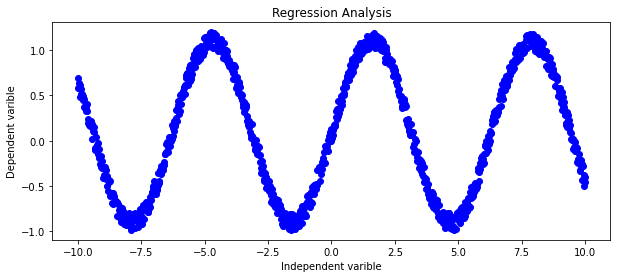

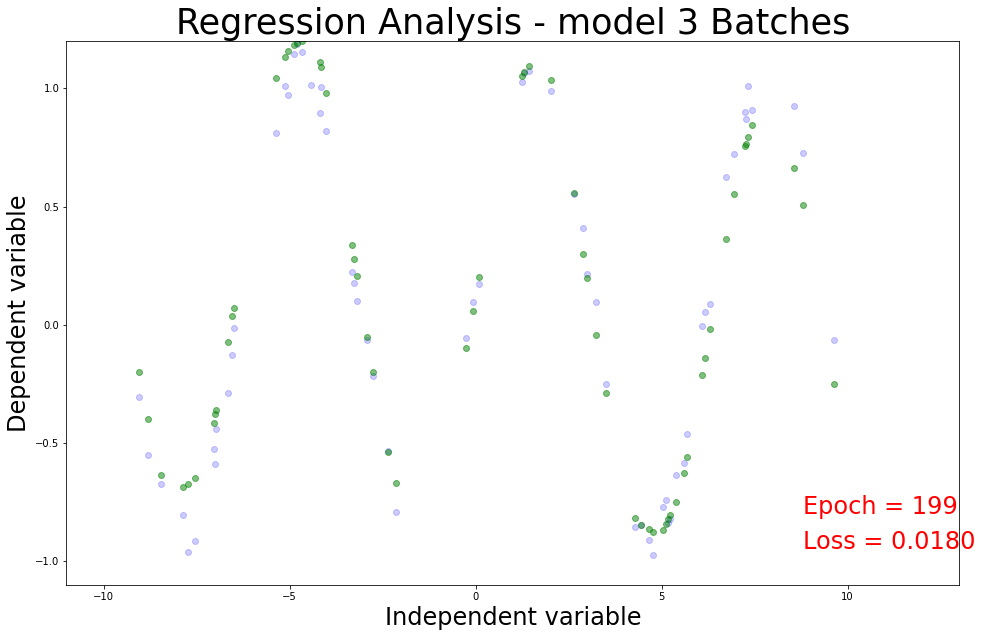

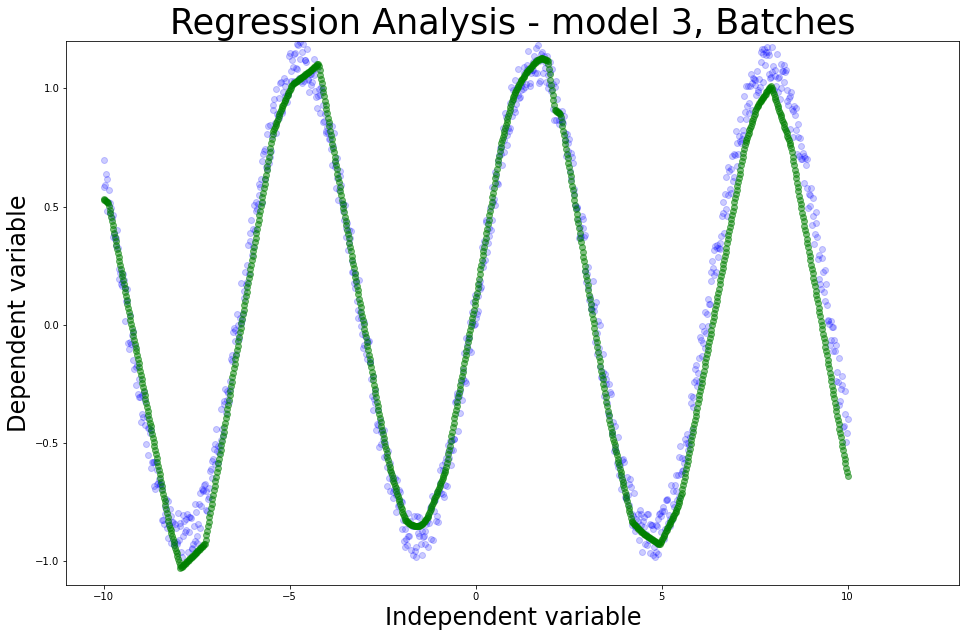

In [ ]:

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt

import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
#x, y = Variable(x), Variable(y)
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('curve_2.png')
plt.show()

# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla()
            ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
            ax.set_xlabel('Independent variable', fontsize=24)
            ax.set_ylabel('Dependent variable', fontsize=24)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.2)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})

            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

    


# save images as a gif    
imageio.mimsave('./curve_2_model_3_batch.gif', my_images, fps=12)


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Regression Analysis - model 3, Batches', fontsize=35)
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.savefig('curve_2_model_3_batches.png')
plt.show()